### <span style="color:#3c2f2f;font-size:1.2em; float:right; font-family:Times New Roman">KEYELA Patatchona, Нпммд-02-21</span>
## <span style="font-family:Times New Roman"> Лабораторная работа № 3 </span>

## Цель работы: 
1. Применение распределений для преобразования случайных величин. 
### Задание. 

Сгенерировать выборку точек, равномерно распределенных внутри круга 
двумя способами:
1. Равномерно распределить точки внутри квадрата, внутрь которого вписана 
окружность, и отфильтровать точки, лежащие за пределами окружности.
2. Генерировать точки путем задания случайного угла и расстояния от центра 
окружности.

Радиус окружности R=10, размер выборки 1000 точек.


In [130]:
# We import libraries we need for the work
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from texttable import Texttable # This is to diplay tables

In [131]:
circle_radius = 10 # The radius of the circle 
set_number = 1000 # The dimension of our generated set 

## Способ №1: Решение в декартовой системе

### Номер 1
Создал рисунок, иллюстрирующий расположение точек сгенерированной выборки внутри окружности;

In [132]:
# We generate uniformly distributed random coordinates in [-10,10]
set_x = []
set_y = []
dots_number = 0

while dots_number <= set_number:
    x = np.random.uniform(-10,10)
    y  = np.random.uniform(-10,10)
    if (x**2 + y**2) <= circle_radius**2: # We consider only points inside the circle
        set_x.append(x)
        set_y.append(y)
        dots_number += 1

In [133]:
# Just to draw circle
circle_angles = np.linspace(0,2*np.pi,100)
circle_x = circle_radius * np.cos(circle_angles)
circle_y = circle_radius * np.sin(circle_angles)

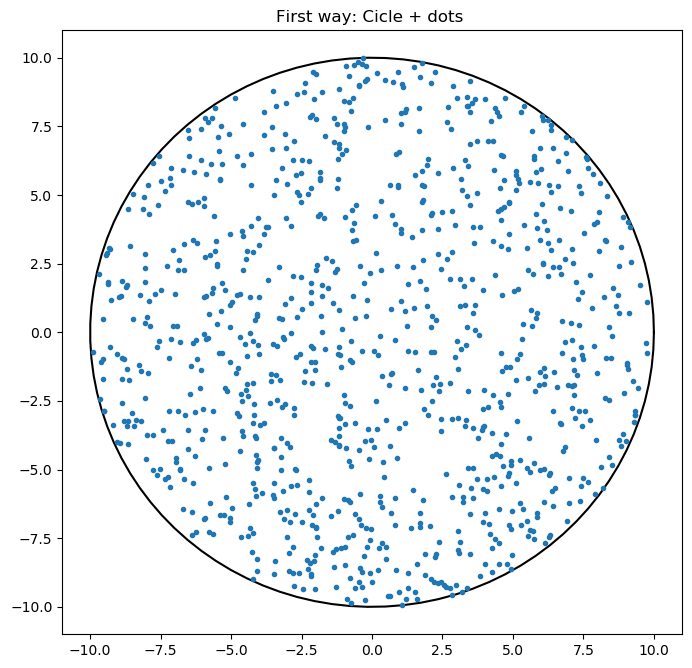

In [134]:
# We draw our circle and place the points inside
plt.figure(dpi=100, figsize=(8,8))
plt.plot(circle_x,circle_y,'black')
plt.plot(set_x,set_y,'.')
plt.title("First way: Cicle + dots ")
plt.show()

### Номер 2
Найти выборочные средние координат точек и их дисперсию

In [106]:
# Getting Mean and Variance of generated sets
mean_set_x = np.mean(set_x)
mean_set_y = np.mean(set_y)
var_set_x = np.var(set_x)
var_set_y = np.var(set_y)
mean_var_table = [['','Set_X','Set_Y'],['Mean',mean_set_x,mean_set_y],['Variance',var_set_x,var_set_y]]
table = Texttable()
table.add_rows(mean_var_table)
print(table.draw())

+----------+--------+--------+
|          | Set_X  | Set_Y  |
+==========+========+========+
| Mean     | -0.031 | 0.077  |
+----------+--------+--------+
| Variance | 25.969 | 23.397 |
+----------+--------+--------+


### Номер 3
Построил график плотности распределения расстояния от случайной равномерно распределенной точки в круге до фиксированной точки лежащей вне окружности (к примеру, с координатами X=20, Y=0).

In [107]:
# THESE ARE THE COORDINATES OF THE BASE STATION
main_X, main_Y = 20,0

In [108]:
# DISTANCE BETWEEN TWO POINTS
def distance(x1,y1,x2=0,y2=0):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [109]:
# WE FIND ALL THE DISTANCES USERS - BASE STATION
distances = []
for x,y in zip(set_x,set_y):
    distances.append(distance(x,y,main_X,main_Y))
distances.sort()

In [110]:
# KERNEL DENSITY EVALUATUION
kde_distance_y = gaussian_kde(distances).evaluate(distances)

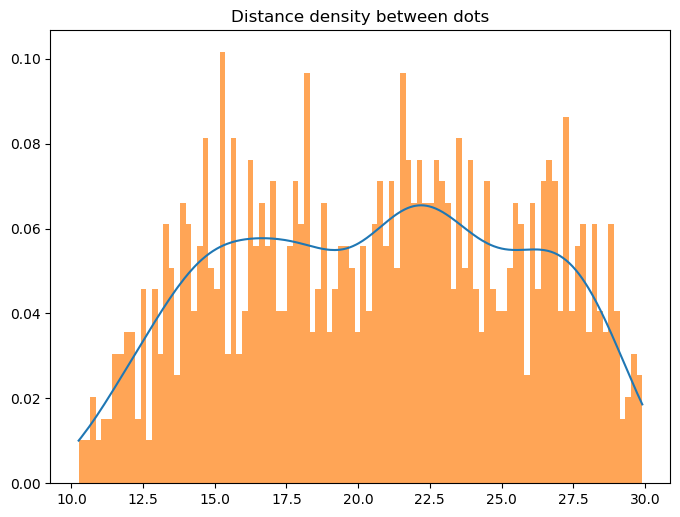

In [111]:
# WE PLOT THE DENSITY FUNCTION OF THE DISTANCE USER-BASE STATION DISTRIBUTION
plt.figure(dpi=100, figsize=(8,6))
plt.plot(distances,kde_distance_y)
plt.hist(distances,bins=100,alpha=0.7,density=True)
plt.title("Distance density between dots")
plt.show()

### Номер 4
Построил график плотности распределения расстояния между двумя случайными точками, равномерно расположенными внутри круга.

In [112]:
# DISTANCES USER - USER
distances_inside = []
for i in range(dots_number-1):
    for j in range(i+1,dots_number):
        distances_inside.append(distance(set_x[i],set_y[i],set_x[j],set_y[j]))

In [113]:
distances_inside.sort()

In [114]:
print("Количество комбинации : ",len(distances_inside),"\n", distances_inside[:100])

Количество комбинации :  500500 
 [0.010923204826410944, 0.016911452754697076, 0.018943491469169904, 0.02220023244222231, 0.026716460550586667, 0.031546313842118846, 0.033316471408766195, 0.034186298908549614, 0.03420114208494905, 0.03454591324887116, 0.038179773191407355, 0.04027140802237096, 0.04045893850289887, 0.04161092917487254, 0.04369439376653236, 0.045748207336073175, 0.0457666618774075, 0.0466261771770145, 0.05008868513756408, 0.05009866457232363, 0.05376395585141322, 0.0553242096478018, 0.056722278670414066, 0.05733733427094722, 0.05897471139698011, 0.059916147826264095, 0.05994629837084986, 0.06320085348128293, 0.06744902558374487, 0.06916380611410278, 0.07064184603875553, 0.0722356398948717, 0.07247165196402802, 0.07388510842836411, 0.07734917058214498, 0.07772927108031456, 0.07847983437133163, 0.07873864675991143, 0.07900300629045542, 0.08499737663652111, 0.08536233230386085, 0.08622199581544321, 0.08775951429198577, 0.08951378009016069, 0.09050006701105924, 0.09059219657

In [115]:
# We uses only a part of the distances data, because it is too large
distances_inside_used = distances_inside[::50]

In [116]:
#Density function evaluation
kde_distance_inside_y = gaussian_kde(distances_inside_used).evaluate(distances_inside_used)

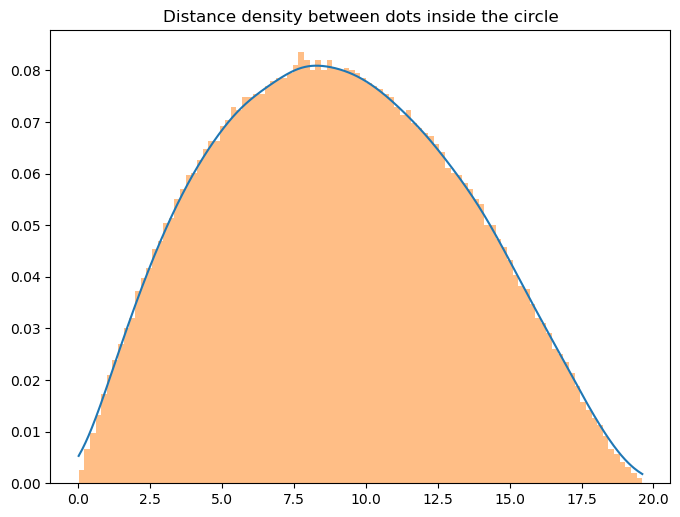

In [117]:
# Plotting the density function of the distance User-User distribution 
plt.figure(dpi=100, figsize=(8,6))
plt.plot(distances_inside_used,kde_distance_inside_y)
plt.hist(distances_inside_used,bins=100,alpha=0.5,density=True)
plt.title("Distance density between dots inside the circle")
plt.show()

# Способ № 2: Решение в полярной системе координат

### Номер 1
Создал рисунок, иллюстрирующий расположение точек сгенерированной выборки внутри окружности;

In [118]:
# Our points are defined by a radius r < R=10 and an angle theta
# We generate our points in our initial circle
set_r = np.random.uniform(0,10,size=set_number)
set_theta = np.random.uniform(0,2*np.pi,size=set_number)

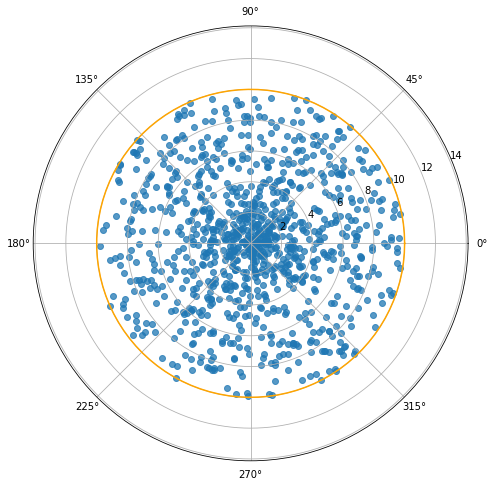

In [119]:
# Here we draw the circle and the points
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='polar')
ax.scatter(set_theta, set_r, alpha=0.75)
_= ax.plot(circle_angles,[circle_radius]*100,color='orange')

### Номер 2
Нашел выборочные средние координат точек и их дисперсию

In [120]:
# Finding the same chararcteristics as previously
mean_set_r = np.mean(set_r)
mean_set_theta = np.mean(set_theta)
var_set_r = np.var(set_r)
var_set_theta = np.var(set_theta)
mean_var_table_rtheta = [['','Set_r','Set_theta'],['Mean',mean_set_r,mean_set_theta],['Variance',var_set_r,var_set_theta]]
table = Texttable()
table.add_rows(mean_var_table_rtheta)
print(table.draw())

+----------+-------+-----------+
|          | Set_r | Set_theta |
+==========+=======+===========+
| Mean     | 5.052 | 3.079     |
+----------+-------+-----------+
| Variance | 8.136 | 3.446     |
+----------+-------+-----------+


### Номер 3
Построил график плотности распределения расстояния от случайной равномерно распределенной точки в круге до фиксированной точки лежащей вне окружности (к примеру, с координатами X=20, Y=0).

In [121]:
# The base station is given through its radius and its angle
main_r,main_angle = 20,0

Правило косинусов $c^2 = a^2 + b^2 -2ab*cos(C)$

In [122]:
#Distance_between_two_ points
def distance_to_point(r1,theta1,r2=main_r,theta2=main_angle):
    return np.sqrt(r1**2 + r2**2 -2*r1*r2*np.cos(theta2-theta1))

In [123]:
# Distances users_to_baseStation
distances_rtheta = []
for r, theta in zip(set_r,set_theta):
    distances_rtheta.append(distance_to_point(r, theta))
distances_rtheta.sort()

In [124]:
# density evaluation
kde_dist_rtheta_y = gaussian_kde(distances_rtheta).evaluate(distances_rtheta)

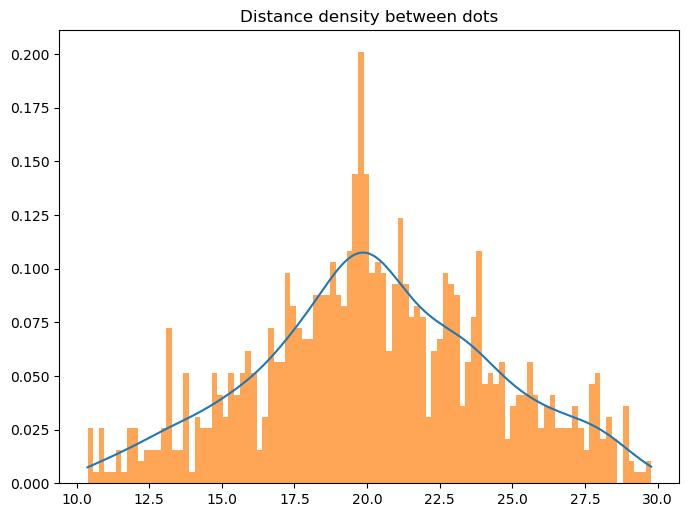

In [125]:
# Plotting the density function of distance user_to_BS distribtion
plt.figure(dpi=100, figsize=(8,6))
plt.plot(distances_rtheta,kde_dist_rtheta_y)
plt.hist(distances_rtheta,bins=100,alpha=0.7,density=True)
plt.title("Distance density between dots")
plt.show()

### Номер 4
Я построил график плотности распределения расстояния между двумя случайными точками, равномерно расположенными внутри круга.

In [126]:
# Distances user_to_user
distances_inside_rtheta = []
for i in range(set_number-1):
    for j in range(i+1,set_number):
        distances_inside_rtheta.append(distance_to_point(set_r[i],set_theta[i],set_r[j],set_theta[j]))
distances_inside_rtheta.sort()

In [127]:
# Once again we use only a portion of the data
dist_inside_rtheta_used = distances_inside_rtheta[::50]

In [128]:
# We do our density evaluation
kde_dist_inside_rtheta_y = gaussian_kde(dist_inside_rtheta_used).evaluate(dist_inside_rtheta_used)

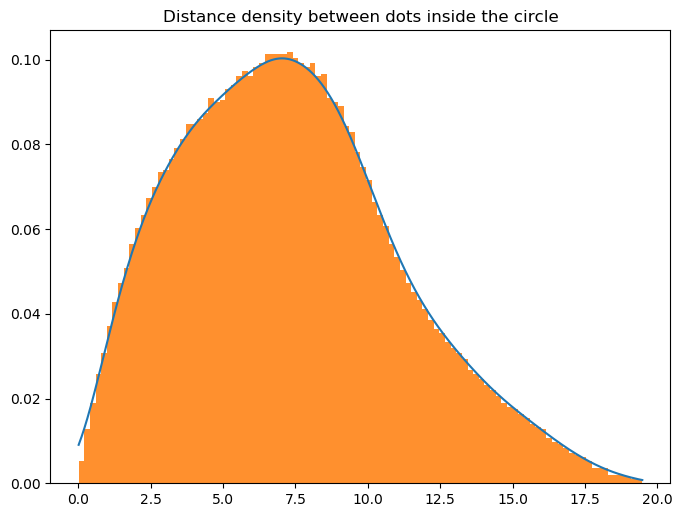

In [129]:
# Finally plotting the density 
plt.figure(dpi=100, figsize=(8,6))
plt.plot(dist_inside_rtheta_used,kde_dist_inside_rtheta_y)
plt.hist(dist_inside_rtheta_used,bins=100,alpha=0.865,density=True)
plt.title("Distance density between dots inside the circle")
plt.show()

# <span style="font-size:30px; font-family:Times New Roman"> Вывод</span>



<span style="font-size:20px; font-family:Times New Roman">
    
    
Эта лабораторная работа была посвещена применению распределений для преобразования случайных величин. В ходе её выполнения я двумя разными подходами получил ответы на поставленные задачи.  Сгенерировал выборку точек, равномерно распределенных внутри круга двумя способами: сгенерировал равномерно распределенные точки внутри квадрата, внутрь которого вписана окружность, и отфильтровал точки, лежащие за пределами окружности и сгенерировал точки путем задания случайного угла и расстояния от центра окружности.

При выполнении взял радиус окружности $R=10$ и размер выборки 1000 точек. Для созданных выборок и сделать следующее:
1. Создал рисунок, иллюстрирующий расположение точек сгенерированной выборки внутри окружности;
2. Нашел выборочные средние координат точек и их дисперсию;
3. Построил график плотности распределения расстояния от случайной равномерно распределенной точки в круге до фиксированной точки лежащей вне окружности 
4. Построил график плотности распределения расстояния между двумя случайными точками, равномерно расположенными внутри круга.

Цель данной лабораторной работы была упешно достигнута.
</span>